# Wstęp do programowania zorientowanego obiektowo

Symulacja populacji stworzeń biologicznych

In [119]:
import random
import matplotlib.pyplot as plt

In [120]:
class Creature:
    alive = True

    def __init__(self, p_death=0.1, p_reproduce=0.1):
        self.p_death = p_death
        self.p_reproduce = p_reproduce
    
    def natural_selection(self):
        if random.random() < self.p_death:
            self.alive = False
            
    def reproduce(self):
        if (random.random() < self.p_reproduce) and self.alive:
            return Creature(self.p_death + random.normalvariate(0, 0.001),
                            self.p_reproduce)

In [121]:
def make_population(n, p_death=0.1, p_reproduce=0.1):
    """Creates population of n creatures"""
    
    return {Creature(p_death, p_reproduce) for _ in range(n)}

def count_alive(population):
    return len({creature for creature in population if creature.alive})

def natural_selection(population):
    {creature.natural_selection() for creature in population}
    
def reproduce(population):
    return {creature.reproduce() for creature in population} - {None}

In [122]:
population = make_population(100)

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 <BarContainer object of 10 artists>)

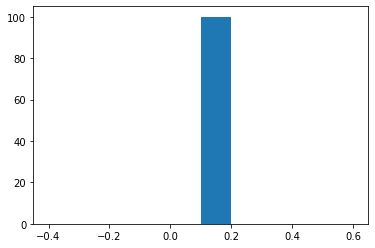

In [123]:
plt.hist([creature.p_death for creature in population])

In [124]:
alive = [count_alive(population)]
for _ in range(1000):
    newborns = reproduce(population)
    natural_selection(population)
    population = population | newborns
    alive.append(count_alive(population))

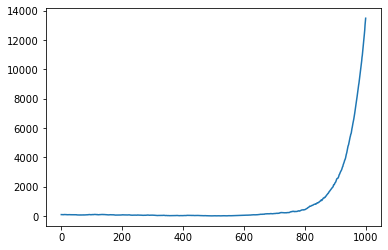

In [125]:
plt.plot(alive)

(array([  47.,  121.,  389., 1916., 3447., 3452., 2606., 1124.,  297.,
          78.]),
 array([0.06270458, 0.06635084, 0.0699971 , 0.07364337, 0.07728963,
        0.08093589, 0.08458215, 0.08822842, 0.09187468, 0.09552094,
        0.09916721]),
 <BarContainer object of 10 artists>)

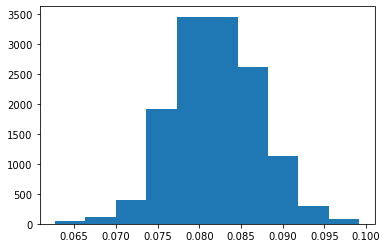

In [126]:
plt.hist([creature.p_death for creature in population if creature.alive])